## Investigate Peninsula supercooling

In CESM2_tune0_ens1011_monthly experiment (also in CESM2_tune0_ens1011).

In [1]:
import xarray as xr
import numpy as np
import glob
import cmocean
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/users/birgal/')

In [10]:
base_dir     = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
ens1011_dir1 = f'{base_dir}output/CESM2_tune0_ens1011_branch1/files0/'
ens1011_dir2 = f'{base_dir}output/CESM2_tune0_ens1011_branch2/files0/'
ens1011_dir3 = f'{base_dir}output/CESM2_tune0_ens1011_branch3/files0/'
ens1011_dir4 = f'{base_dir}output/CESM2_tune0_ens1011_branch4/files0/'
ens1011_dir0 = f'{base_dir}output/CESM2_tune0_ens1011_monthly/files0/'
era5_ref_dir = f'{base_dir}output/ERA5_test6/files/'
forcing = f'{base_dir}climate-forcing/CESM2/LE2/bias-corrected/ens1011/'
era5 = f'{base_dir}ERA5-forcing/daily/files/'

In [11]:
year  = 1983 
# cesm2T = xr.open_dataset(f'{ens1011_dir}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
# cesm2S = xr.open_dataset(f'{ens1011_dir}eANT025.L121_1m_{year}0101_{year}1231_SBC.nc')
cesm2i0 = xr.open_dataset(f'{ens1011_dir0}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# cesm2i1 = xr.open_dataset(f'{ens1011_dir1}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# cesm2i2 = xr.open_dataset(f'{ens1011_dir2}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# cesm2i3 = xr.open_dataset(f'{ens1011_dir3}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# cesm2i4 = xr.open_dataset(f'{ens1011_dir4}eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
era5i  = xr.open_dataset(f'{era5_ref_dir}eANT025.L121_1m_19900101_19901231_icemod.nc')
# cesm2f = xr.open_dataset(f'{forcing}CESM2-LE2_ens1011.001_FSDS_bias_corr_monthly_y{year}.nc')

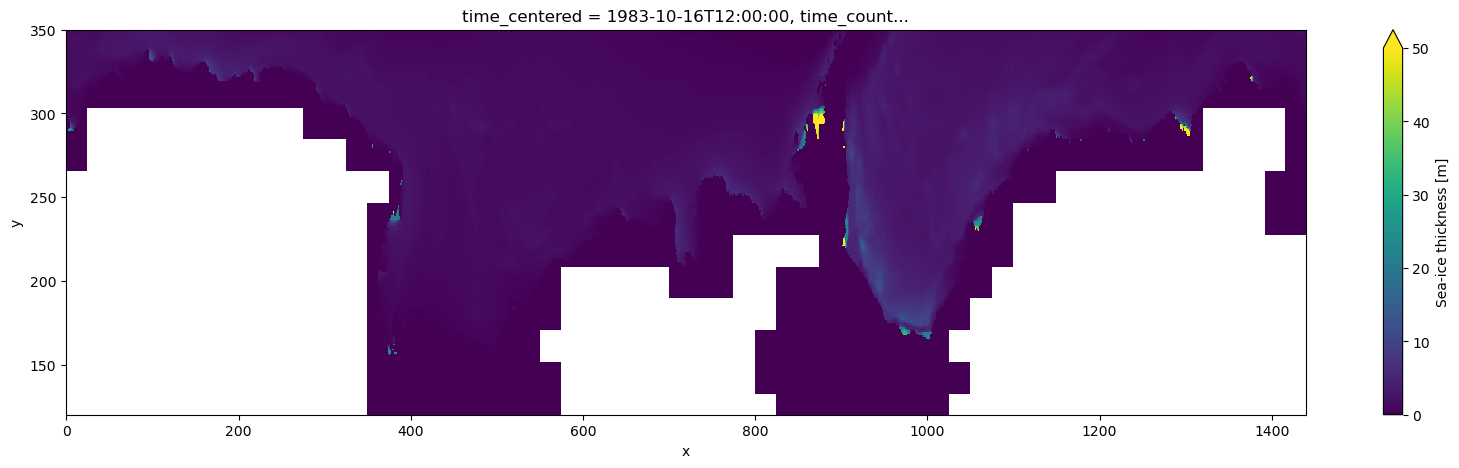

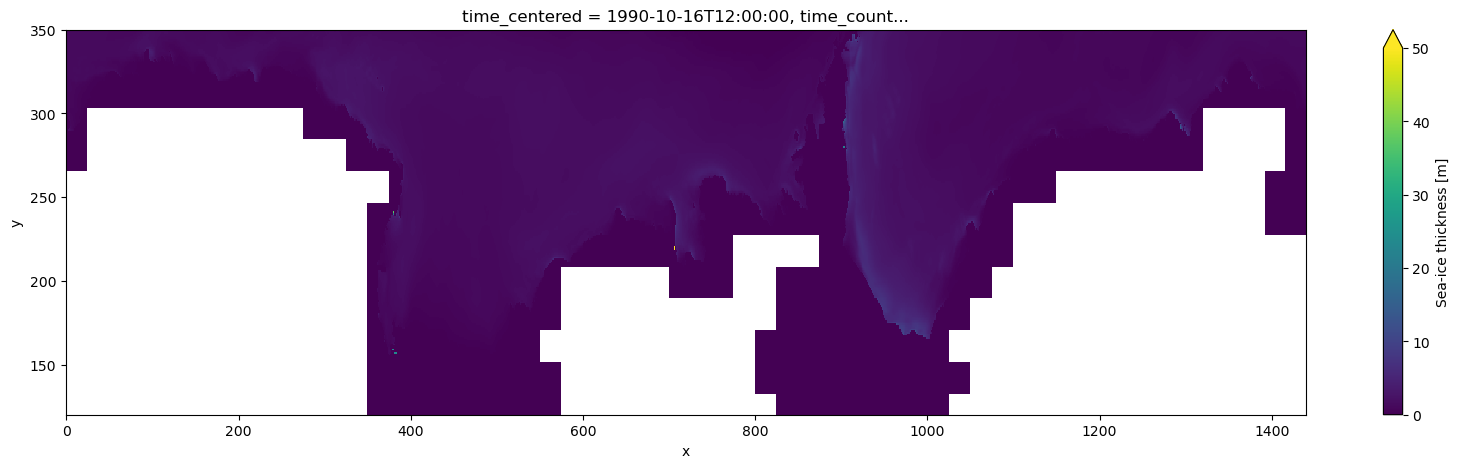

In [12]:
cesm2i0.sithic.isel(time_counter=9).plot(figsize=(20,5), ylim=(120,350), vmin=0, vmax=50)
era5i.sithic.isel(time_counter=9).plot(figsize=(20,5), ylim=(120,350), vmin=0, vmax=50)

Text(0.5, 1.0, 'ERA5 radiation otherwise CESM2')

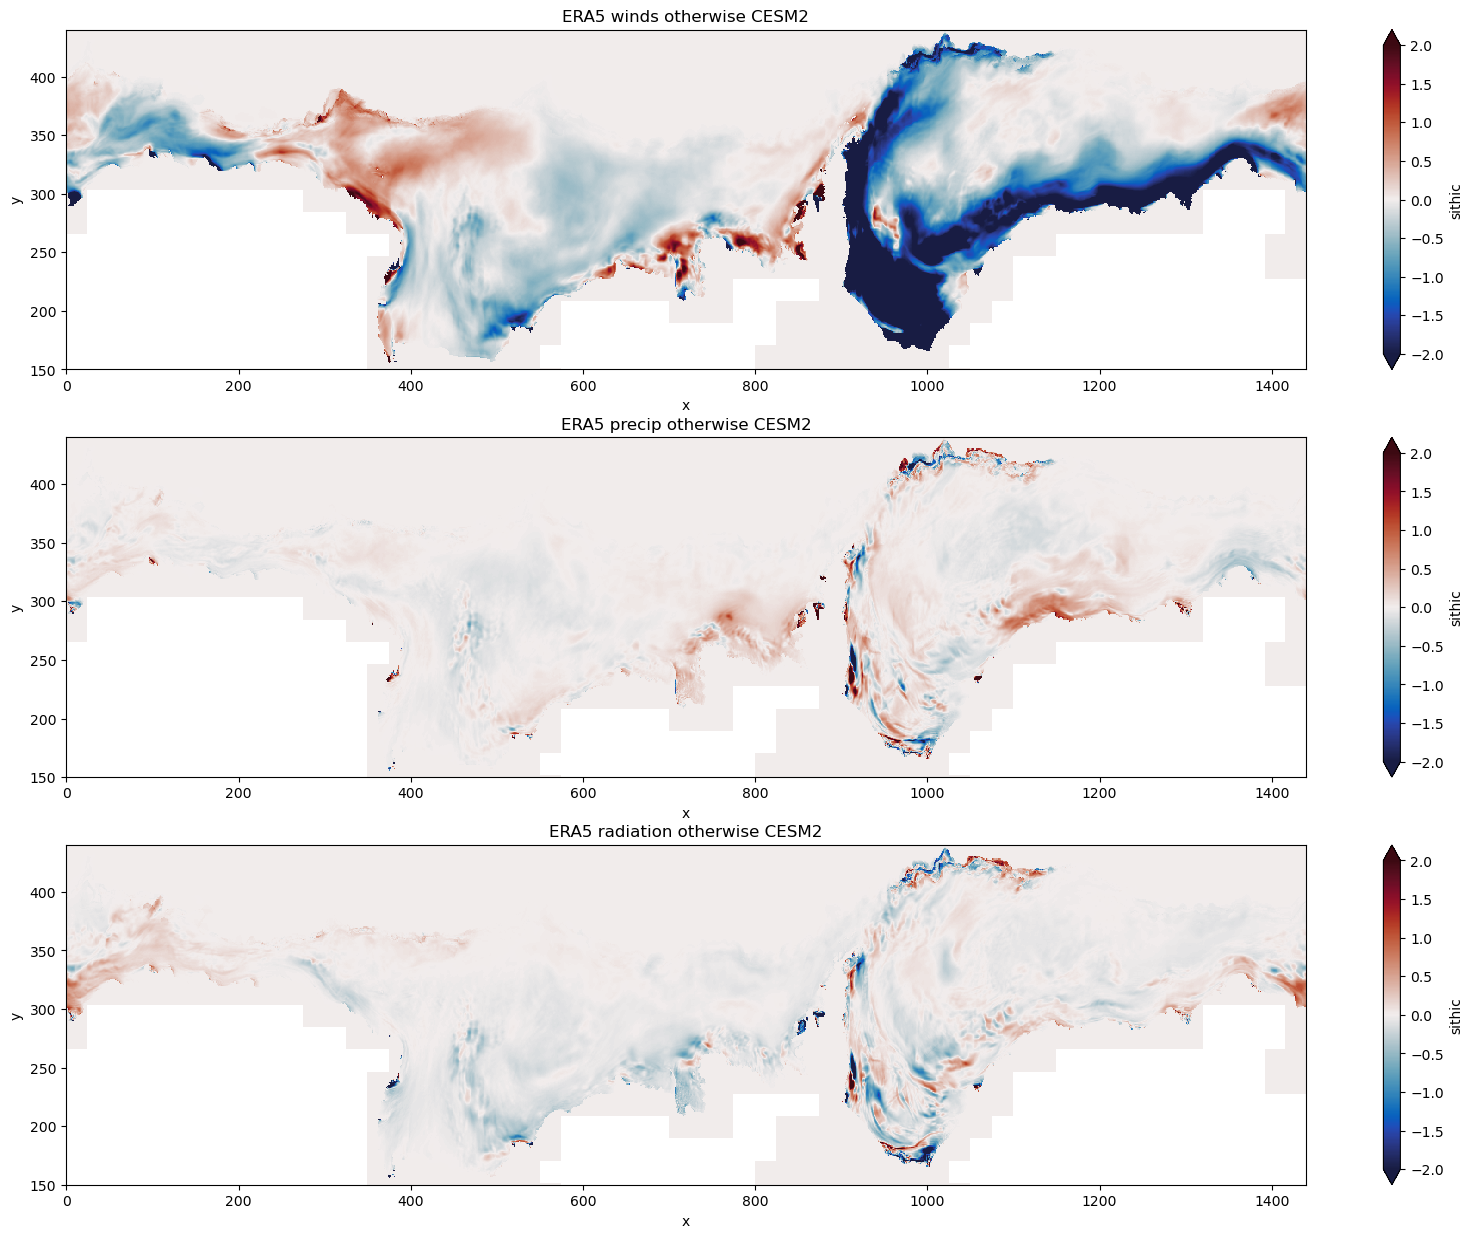

In [37]:
fig, ax = plt.subplots(3,1, figsize=(20,15))
(cesm2i1.sithic - cesm2i2.sithic).isel(time_counter=6).plot(ax=ax[0], vmin=-2, vmax=2, cmap=cmocean.cm.balance, ylim=(150,440))
(cesm2i3.sithic - cesm2i2.sithic).isel(time_counter=6).plot(ax=ax[1], vmin=-2, vmax=2, cmap=cmocean.cm.balance, ylim=(150,440))
(cesm2i4.sithic - cesm2i2.sithic).isel(time_counter=6).plot(ax=ax[2], vmin=-2, vmax=2, cmap=cmocean.cm.balance, ylim=(150,440))
ax[0].set_title('ERA5 winds otherwise CESM2')
ax[1].set_title('ERA5 precip otherwise CESM2')
ax[2].set_title('ERA5 radiation otherwise CESM2')

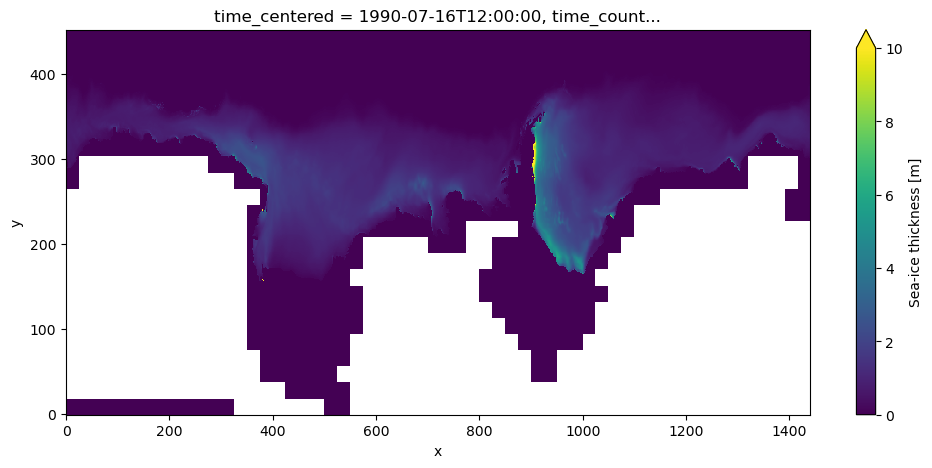

In [89]:
era5i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)

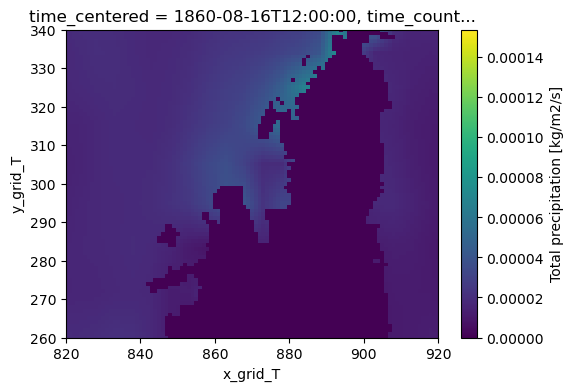

In [66]:
cesm2S['precip'].isel(time_counter=7).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920))
# cesm2S['sosss'].isel(time_counter=7).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=32, vmax=35)

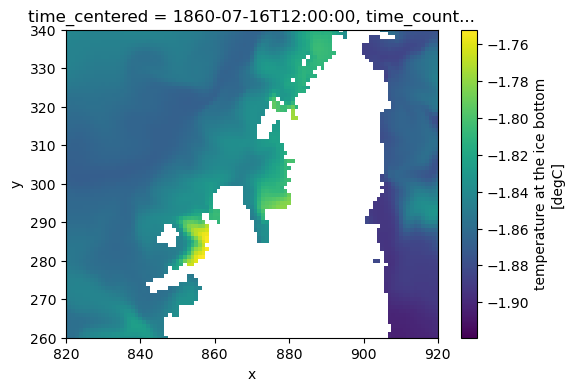

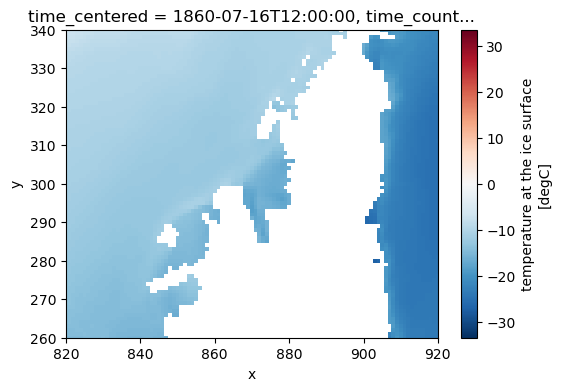

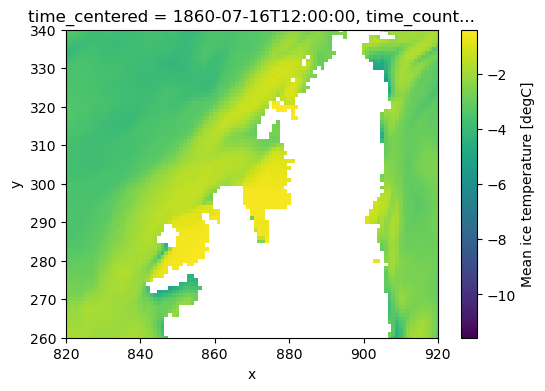

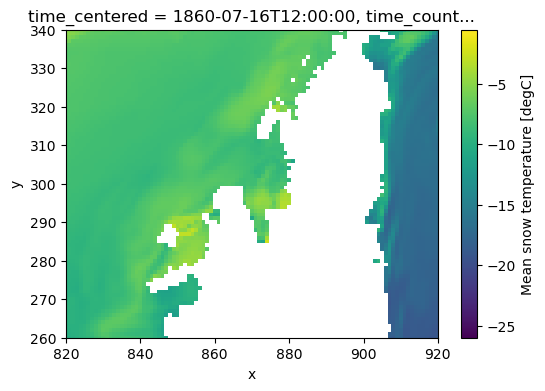

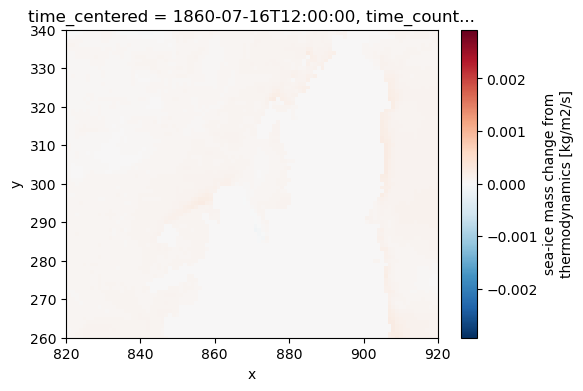

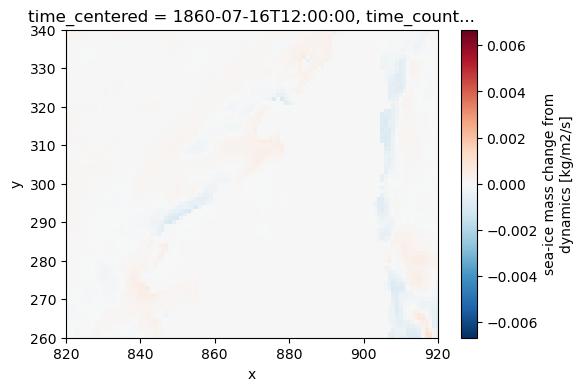

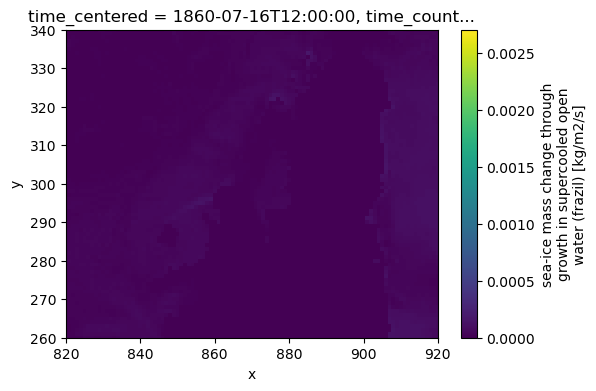

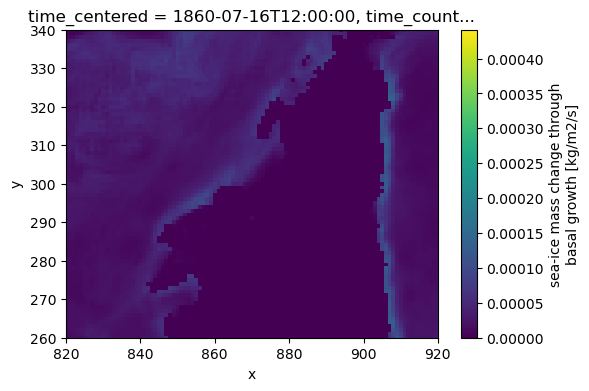

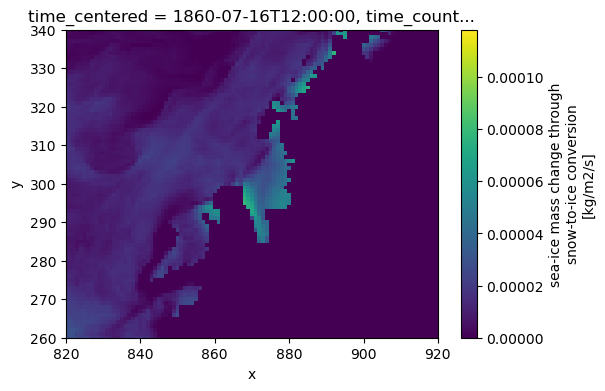

In [42]:
# for var in list(cesm2i.keys())[5:]:
#     cesm2i[var].isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920))

for var in ['sitbot', 'sittop', 'sitemp', 'sntemp', 'dmithd', 'dmidyn', 'dmiopw', 'dmibog', 'dmisni']:
    cesm2i[var].isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920))
# high snow volume and high sea ice thickness low sea ice salinity, very high compressive sea ice strength, 

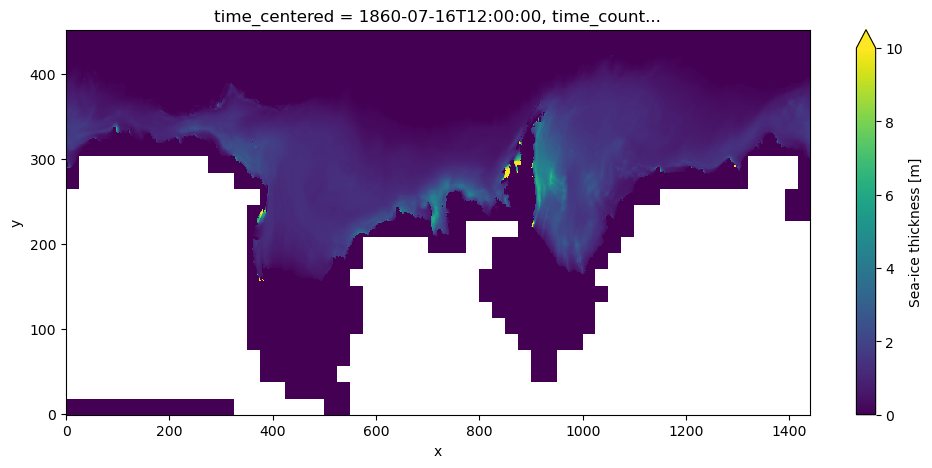

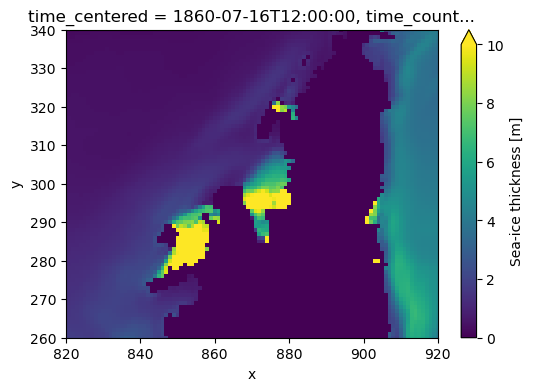

In [53]:
cesm2i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)
cesm2i.sithic.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=10)

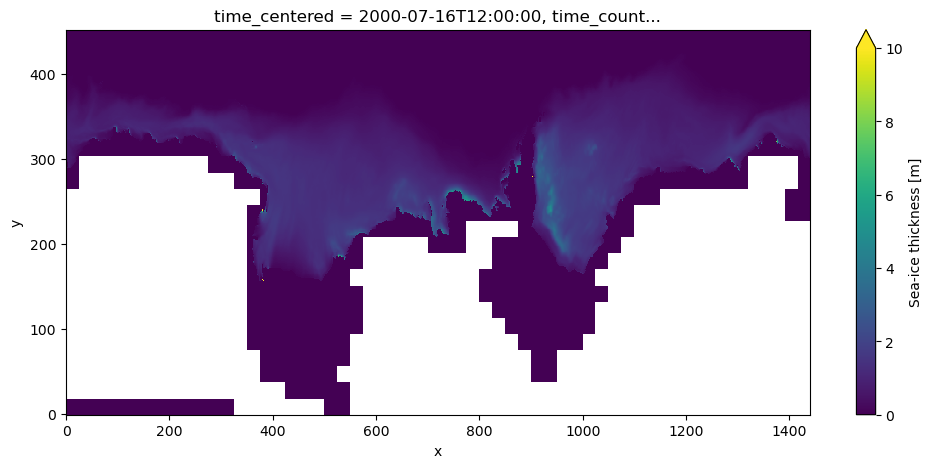

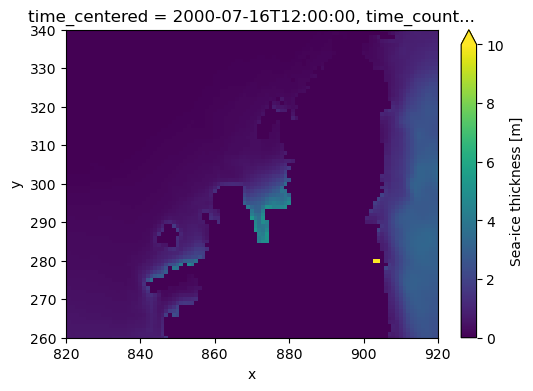

In [54]:
era5i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)
era5i.sithic.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=10)

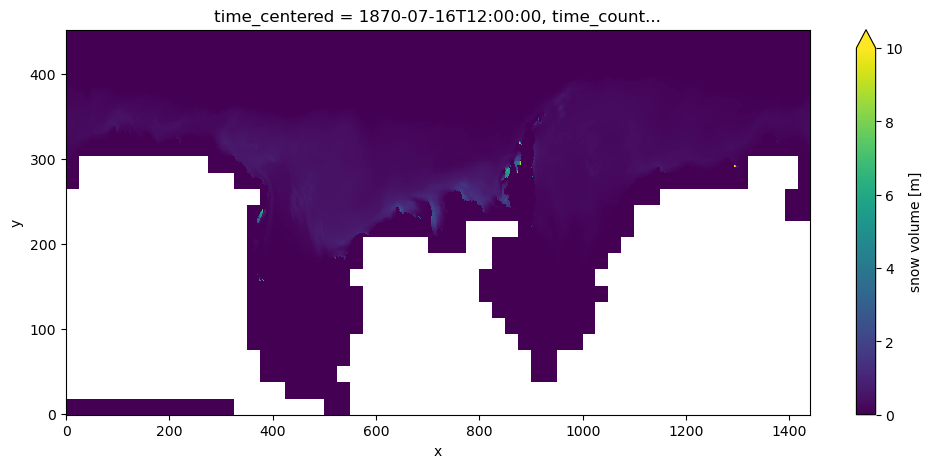

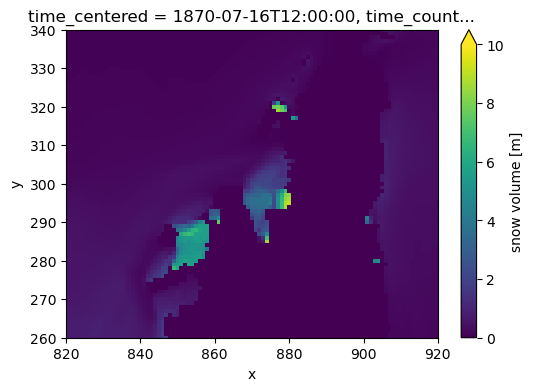

In [14]:
cesm2i.snvolu.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=10)
cesm2i.snvolu.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=10)

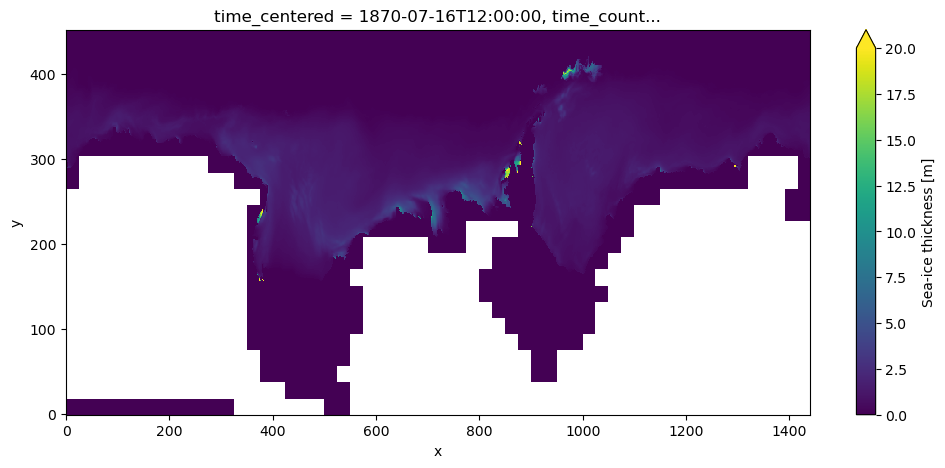

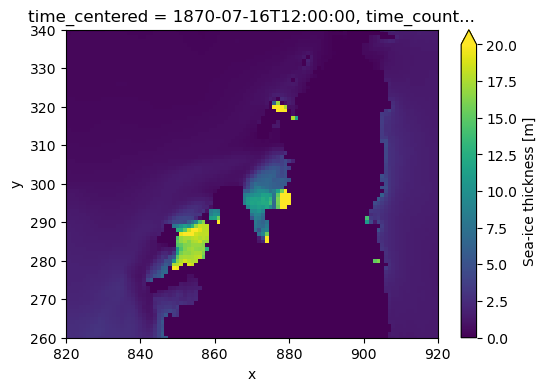

In [15]:
cesm2i.sithic.isel(time_counter=6).plot(figsize=(12,5), vmin=0, vmax=20)
cesm2i.sithic.isel(time_counter=6).plot(figsize=(6,4), ylim=(260,340), xlim=(820,920), vmin=0, vmax=20)

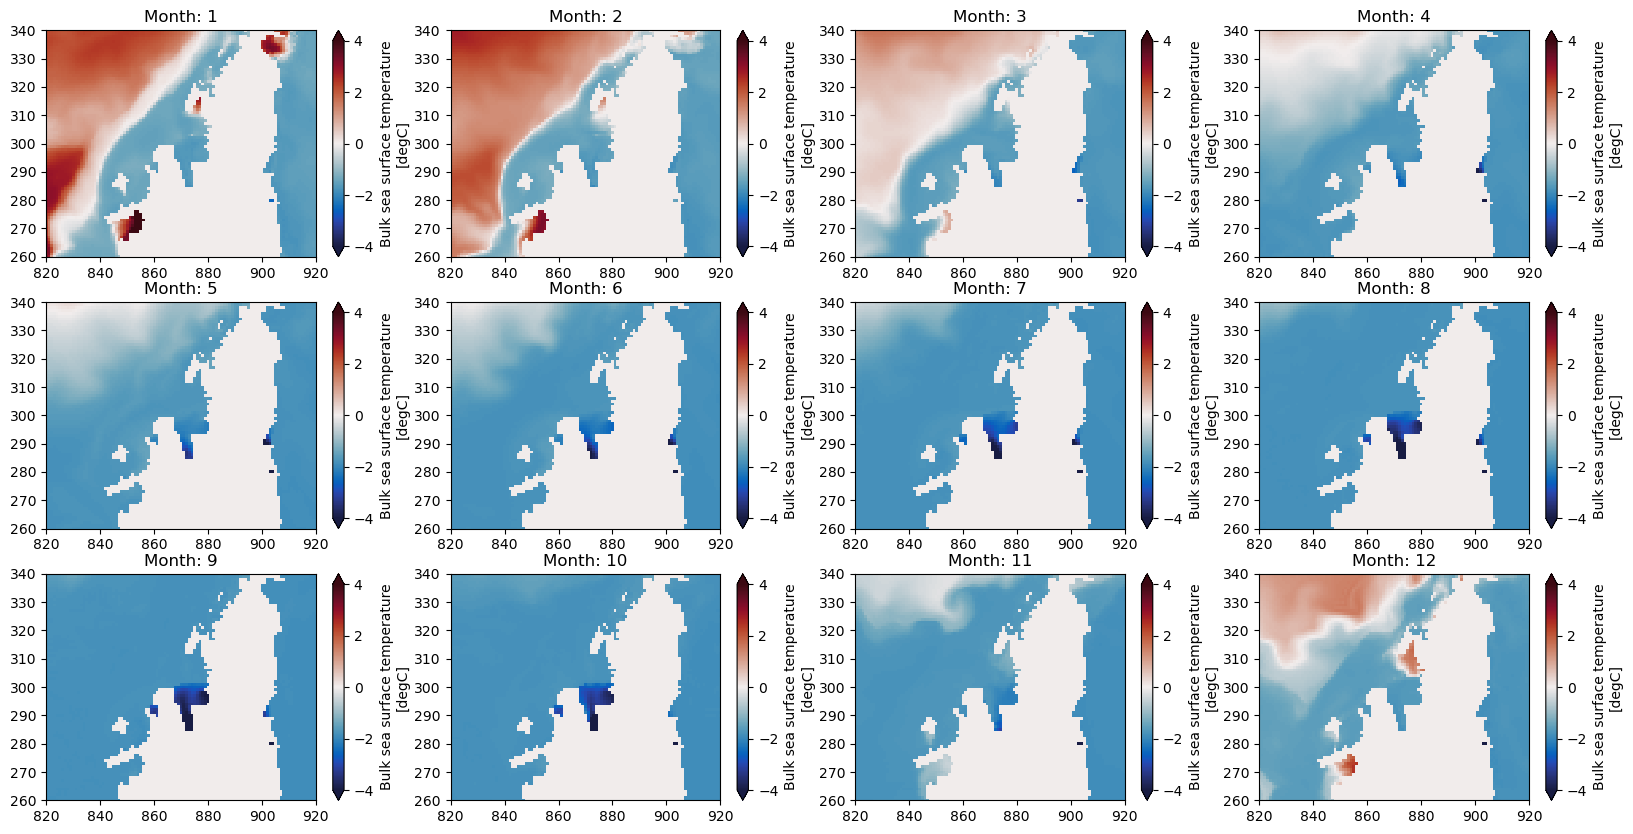

In [11]:
fig, ax = plt.subplots(3,4, figsize=(20,10))

for a, axis in enumerate(ax.ravel()):
    cesm2T.sosst.isel(time_counter=a).plot(ax=axis, vmin=-4, vmax=4, cmap=cmocean.cm.balance, ylim=(260,340), xlim=(820,920))
    axis.set_title(f'Month: {a+1}')
    axis.set_xlabel(''); axis.set_ylabel('');[4]